In [1]:
import pandas as pd
import numpy as np

import json
from rdkit import Chem
import pandas as pd
import itertools
import sys
from tqdm import tqdm 
from itertools import chain, combinations
import sys
import multiprocessing as mp
from functools import partial
from collections import Counter
tqdm.pandas()
sys.path.append('../')
from common import *

In [2]:
path = '../../../Results/not_lipid/top50_0.3_add_no_ec_re/'
num = 50
cut_off = 0.3
not_lipid_rxndb_inteme_drop_duplicate_path = path + f'RXNdb_all_top40_0.3_all.csv'
cut_off_path = f'../../../Results/not_lipid/top{num}_{cut_off}_add_no_ec_re/'
ymdb_output_final = '../../../Data/ymdb/ymdb_final_result.xlsx'
mnxmeta_smile_inchikey_dict_path = '../../../Data/database/mnxmeta_smile_inchikey_dict.json'

# not_lipid_rxndb_all_path = '../Data/output/not_lipid/retrosynthesis/RXNdb_all_0.3.json'
# not_lipid_rxndb_to_model_path = '../Data/output/not_lipid/retrosynthesis/rxndb_to_model.csv'
# mnxmeta_smile_inchikey_dict_path = '../Data/output/database/mnxmeta_smile_inchikey_dict.json'
YMDB_success_met_smile_uptake_file = cut_off_path + f'YMDB_success_met_smile_uptake_top{num}_{cut_off}.pickle'
not_lipid_YMDB_fail_met_smile_uptake_file = cut_off_path + f'YMDB_fail_met_smile_uptake_top{num}_{cut_off}.pickle'

not_lipid_rxndb_met_max_score_file = cut_off_path + f'rxndb_met_max_score_pd_top{num}_{cut_off}_uptake.csv'
uptake_met_path = '../../../Data/ymdb/ymdb_uptake.csv'
not_lipid_rxndb_inteme_only_one_new_target_path = path + 'RXNdb_inteme_only_one_new_target_top50.csv'
total_met_inchikey0_file = '../../../Data/total_met_inchikey0.pickle'
yeast_model_path = '../../../Data/model/yeast-GEM-final.csv'
sink0_path = cut_off_path + 'sink0_new_met_only_new_one_top50.pickle'
not_lipid_YMDB_fail_met_smile_final_file = cut_off_path + f'YMDB_fail_met_smile_final_top{num}_{cut_off}.pickle'
not_lipid_fail_smiles2metnetx_path = cut_off_path + f'fail_smiles2metnetx_top{num}_{cut_off}.pickle'
not_lipid_YMDB_fail_met_smile_final_expand_file = cut_off_path + f'YMDB_fail_met_smile_final_expand_top{num}_{cut_off}.pickle'
not_lipid_YMDB_fail_met_smile_final_expand_txt_file = cut_off_path + f'YMDB_fail_met_smile_final_expand_top{num}_{cut_off}.txt'
not_lipid_YMDB_fail_met_smile_final_expand_txt_file_ = cut_off_path + f'YMDB_fail_met_smile_final_expand_top{num}_{cut_off}_.txt'
sink_inchi_path = cut_off_path + 'sink_inchi.csv'
sink_smiles_path = cut_off_path + 'sink_smiles.csv'

In [3]:
# with open(met_path, 'r') as f:
#     met_inchikey = json.load(f)
# print('met_inchikey', len(met_inchikey))

In [22]:
sink0 = load_pickle(sink0_path)
len(sink0)

2011

In [3]:
def myfunc_new(index_row,sink0,total_inchikey0):
    row = index_row[1]
    # reactantsmile = row['rxn_smiles_basic'].split('>>')[0].split('.')
    # productsmile = row['rxn_smiles_basic'].split('>>')[1].split('.')
    reactant_smile = row['reactant_inchikey0']
    # productsmile = row['product_inchikey0']
    productsmile = row['product_inchikey0'].split('.')

    reactant_smile = ast.literal_eval(reactant_smile)
    # productsmile = ast.literal_eval(productsmile)

    productsmile_in_total = []
    
    add_inchikey0 = []
    for i in productsmile:
            #met_mol = Chem.MolFromSmiles(i)
            #can_smiles = Chem.MolToSmiles(met_mol,True)
        try:  
          
            if i in sink0:
                productsmile_in_total.append(i)
                #if i in NewdbSmiles_3:
        except:
            continue
    #value['gem_pool_met'] = reactantsmile_in_total
    if len(productsmile_in_total) == len(productsmile):
        for i in reactant_smile:
            if i in total_inchikey0:
                
              #if i not in sink_smiles:
            #if inchikey0 not in sink0:
                add_inchikey0.append(i)
    return add_inchikey0
def myfunc_reverse_new(index_row,sink0,total_inchikey0):
    row = index_row[1]
    # reactantsmile = row['rxn_smiles_basic'].split('>>')[0].split('.')
    # productsmile = row['rxn_smiles_basic'].split('>>')[1].split('.')
    # reactant_smile = row['reactant_smile'].split('.')
    # productsmile = row['productsmile'].split('.')
    reactant_smile = row['reactant_inchikey0']
    productsmile = row['product_inchikey0'].split('.')

    # productsmile = row['product_inchikey0']
    reactant_smile = ast.literal_eval(reactant_smile)
    # productsmile = ast.literal_eval(productsmile)


    reactant_smile_in_total = []
    
    add_inchikey0 = []
    for i in reactant_smile:
            #met_mol = Chem.MolFromSmiles(i)
            #can_smiles = Chem.MolToSmiles(met_mol,True)
        try:   #    
            if i not in total_inchikey0:
                reactant_smile_in_total.append(i)
            else:
                if i in sink0:
                # if smiles2inchikey0(i) in sink0:
                    reactant_smile_in_total.append(i)
                #if i in NewdbSmiles_3:
        except:
            continue
    #value['gem_pool_met'] = reactantsmile_in_total
    if len(reactant_smile_in_total) == len(reactant_smile):
        for i in productsmile:
                
              #if i not in sink_smiles:
            # inchikey0 = smiles2inchikey0(i)
            #if inchikey0 not in sink0:
            add_inchikey0.append(i)
    return add_inchikey0
    

             
        

In [4]:
yeast8_total_smiles = get_all_smiles_in_model(yeast_model_path,ymdb_output_final)

success_smiles = load_pickle(YMDB_success_met_smile_uptake_file)
uptake_met = pd.read_csv(uptake_met_path)   
uptake_smiles = uptake_met['SMILES'].to_list()
sink_smiles = yeast8_total_smiles + success_smiles + uptake_smiles
sink0 = [smiles2inchikey0(i) for i in sink_smiles]
not_lipid_rxndb_met_max_score = pd.read_csv(not_lipid_rxndb_met_max_score_file)
not_lipid_rxndb_met_max_score = not_lipid_rxndb_met_max_score[not_lipid_rxndb_met_max_score['score']==1]
not_lipid_rxndb_met_max_smiles = not_lipid_rxndb_met_max_score['smile'].tolist()
not_lipid_rxndb_met_max_inchikey0 = [smiles2inchikey0(i) for i in not_lipid_rxndb_met_max_smiles]
sink0 = sink0 + not_lipid_rxndb_met_max_inchikey0
sink0 = list(set(sink0))
print(len(sink0))


1669


In [5]:
not_lipid_rxndb_inteme_only_one_new = pd.read_csv(not_lipid_rxndb_inteme_only_one_new_target_path)
print(not_lipid_rxndb_inteme_only_one_new.shape)
# sink0 = load_pickle(sink0_path)

(106740, 14)


In [6]:
not_lipid_rxndb_inteme_only_one_new.head()

,Unnamed: 0.1,Unnamed: 0,EC number,rule,templateID,templateSubstrate,rxn_smiles_basic,rxn_smiles_final,reactant_smile,productsmile,similarity,reactant_inchikey0,product_inchikey0,new_num
0,0,0,2.4.1.170,[#8;a:1]:[c:2]1:[c:3]:[c:4](-[O-;H0;D1:5]):[c:...,MNXR152429,['O=c1ccn([C@@H]2O[C@H](COP(=O)([O-])OP(=O)([O...,COc1cc(-c2oc3cc(OC4OCC([NH3+])C(O)C4O)cc([O-])...,COc1cc(-c2oc3cc(OC4OCC([NH3+])C(O)C4O)cc([O-])...,COc1cc(-c2oc3cc(OC4OCC([NH3+])C(O)C4O)cc([O-])...,[NH3+]C1COC(OP(=O)([O-])OP(=O)([O-])OCC2OC(n3c...,"[0.9571428571, 0.9354838710000001]","['CVOGVDQKJUPDIG', 'XCCTYIAWTASOJW']",GWBAKYBSWHQNMQ.IZQSVPBOUDKVDZ,1
1,1,1,2.4.1.170,[#8;a:1]:[c:2]1:[c:3]:[c:4](-[O-;H0;D1:5]):[c:...,MNXR152429,['O=c1ccn([C@@H]2O[C@H](COP(=O)([O-])OP(=O)([O...,COc1cc(-c2[o+]c3cc([O-])cc(OC4OCC([NH3+])C(O)C...,COc1cc(-c2[o+]c3cc([O-])cc(OC4OCC([NH3+])C(O)C...,COc1cc(-c2[o+]c3cc([O-])cc(OC4OCC([NH3+])C(O)C...,[NH3+]C1COC(OP(=O)([O-])OP(=O)([O-])OCC2OC(n3c...,"[0.9571428571, 0.9032258065000001]","['WOZOLHAMDXZBPE', 'XCCTYIAWTASOJW']",GWBAKYBSWHQNMQ.XFDQJKDGGOEYPI,1
2,2,2,2.4.1.170,[#8;a:1]:[c:2]1:[c:3]:[c:4](-[O-;H0;D1:5]):[c:...,MNXR152429,['O=c1ccn([C@@H]2O[C@H](COP(=O)([O-])OP(=O)([O...,COc1cc(-c2[o+]c3cc([O-])cc(OC4OCC([NH3+])C(O)C...,COc1cc(-c2[o+]c3cc([O-])cc(OC4OCC([NH3+])C(O)C...,COc1cc(-c2[o+]c3cc([O-])cc(OC4OCC([NH3+])C(O)C...,[NH3+]C1COC(OP(=O)([O-])OP(=O)([O-])OCC2OC(n3c...,"[0.9571428571, 0.875]","['LDUQPOYRHHKVOL', 'XCCTYIAWTASOJW']",GWBAKYBSWHQNMQ.KZMACGJDUUWFCH,1
3,3,3,2.4.1.170,[#8;a:1]:[c:2]1:[c:3]:[c:4](-[O-;H0;D1:5]):[c:...,MNXR152429,['O=c1ccn([C@@H]2O[C@H](COP(=O)([O-])OP(=O)([O...,O=c1ccn(C2OC(COP(=O)([O-])OP(=O)([O-])[O-])C(O...,O=c1ccn(C2OC(COP(=O)([O-])OP(=O)([O-])[O-])C(O...,O=c1ccn(C2OC(COP(=O)([O-])OP(=O)([O-])[O-])C(O...,[NH3+]C1COC(OP(=O)([O-])OP(=O)([O-])OCC2OC(n3c...,"[0.9571428571, 0.8125]","['BKDLQQDXPKEIAZ', 'XCCTYIAWTASOJW']",GWBAKYBSWHQNMQ.REFJWTPEDVJJIY,1
4,4,4,2.4.1.170,[#8;a:1]:[c:2]1:[c:3]:[c:4](-[O-;H0;D1:5]):[c:...,MNXR152429,['O=c1ccn([C@@H]2O[C@H](COP(=O)([O-])OP(=O)([O...,O=c1ccn(C2OC(COP(=O)([O-])OP(=O)([O-])[O-])C(O...,O=c1ccn(C2OC(COP(=O)([O-])OP(=O)([O-])[O-])C(O...,O=c1ccn(C2OC(COP(=O)([O-])OP(=O)([O-])[O-])C(O...,[NH3+]C1COC(OP(=O)([O-])OP(=O)([O-])OCC2OC(n3c...,"[0.9571428571, 0.7812500000000001]","['JGLBPBXASDDKBL', 'XCCTYIAWTASOJW']",GWBAKYBSWHQNMQ.VEVZSMAEJFVWIL,1


In [7]:
def pool_func(df,sink0,total_inchikey0):
    add_inchikey0 = list(map(partial(myfunc_new,sink0=sink0,total_inchikey0 = total_inchikey0),df.iterrows()))
    add_inchikey0_ = list(map(partial(myfunc_reverse_new,sink0=sink0,total_inchikey0 = total_inchikey0),df.iterrows()))
    #flatten
    add_inchikey0 = [j for i in add_inchikey0 for j in i]
    add_inchikey0_ = [j for i in add_inchikey0_ for j in i]
    return (add_inchikey0,add_inchikey0_)

In [8]:
total_inchikey0 = load_pickle(total_met_inchikey0_file)


In [11]:
chunks = np.array_split(not_lipid_rxndb_inteme_only_one_new, 100)
with mp.Pool(40) as pool:
    results = list(tqdm(pool.imap(partial(pool_func,sink0 = sink0,total_inchikey0 = total_inchikey0), chunks), total=len(chunks)))
for i in results:
        if i[0]:
            sink0 += i[0]
        if i[1]:
            sink0 += i[1]
sink0 = list(set(sink0))
print(len(sink0))


100%|██████████| 100/100 [00:03<00:00, 30.42it/s]


1943


In [24]:
sink0 = load_pickle(sink0_path)
len(list(set(sink0)))

2011

In [12]:
not_lipid_rxndb_inteme_only_one_new.head()

,Unnamed: 0.1,Unnamed: 0,EC number,rule,templateID,templateSubstrate,rxn_smiles_basic,rxn_smiles_final,reactant_smile,productsmile,similarity,reactant_inchikey0,product_inchikey0,new_num
0,0,0,2.4.1.170,[#8;a:1]:[c:2]1:[c:3]:[c:4](-[O-;H0;D1:5]):[c:...,MNXR152429,['O=c1ccn([C@@H]2O[C@H](COP(=O)([O-])OP(=O)([O...,COc1cc(-c2oc3cc(OC4OCC([NH3+])C(O)C4O)cc([O-])...,COc1cc(-c2oc3cc(OC4OCC([NH3+])C(O)C4O)cc([O-])...,COc1cc(-c2oc3cc(OC4OCC([NH3+])C(O)C4O)cc([O-])...,[NH3+]C1COC(OP(=O)([O-])OP(=O)([O-])OCC2OC(n3c...,"[0.9571428571, 0.9354838710000001]","['CVOGVDQKJUPDIG', 'XCCTYIAWTASOJW']",GWBAKYBSWHQNMQ.IZQSVPBOUDKVDZ,1
1,1,1,2.4.1.170,[#8;a:1]:[c:2]1:[c:3]:[c:4](-[O-;H0;D1:5]):[c:...,MNXR152429,['O=c1ccn([C@@H]2O[C@H](COP(=O)([O-])OP(=O)([O...,COc1cc(-c2[o+]c3cc([O-])cc(OC4OCC([NH3+])C(O)C...,COc1cc(-c2[o+]c3cc([O-])cc(OC4OCC([NH3+])C(O)C...,COc1cc(-c2[o+]c3cc([O-])cc(OC4OCC([NH3+])C(O)C...,[NH3+]C1COC(OP(=O)([O-])OP(=O)([O-])OCC2OC(n3c...,"[0.9571428571, 0.9032258065000001]","['WOZOLHAMDXZBPE', 'XCCTYIAWTASOJW']",GWBAKYBSWHQNMQ.XFDQJKDGGOEYPI,1
2,2,2,2.4.1.170,[#8;a:1]:[c:2]1:[c:3]:[c:4](-[O-;H0;D1:5]):[c:...,MNXR152429,['O=c1ccn([C@@H]2O[C@H](COP(=O)([O-])OP(=O)([O...,COc1cc(-c2[o+]c3cc([O-])cc(OC4OCC([NH3+])C(O)C...,COc1cc(-c2[o+]c3cc([O-])cc(OC4OCC([NH3+])C(O)C...,COc1cc(-c2[o+]c3cc([O-])cc(OC4OCC([NH3+])C(O)C...,[NH3+]C1COC(OP(=O)([O-])OP(=O)([O-])OCC2OC(n3c...,"[0.9571428571, 0.875]","['LDUQPOYRHHKVOL', 'XCCTYIAWTASOJW']",GWBAKYBSWHQNMQ.KZMACGJDUUWFCH,1
3,3,3,2.4.1.170,[#8;a:1]:[c:2]1:[c:3]:[c:4](-[O-;H0;D1:5]):[c:...,MNXR152429,['O=c1ccn([C@@H]2O[C@H](COP(=O)([O-])OP(=O)([O...,O=c1ccn(C2OC(COP(=O)([O-])OP(=O)([O-])[O-])C(O...,O=c1ccn(C2OC(COP(=O)([O-])OP(=O)([O-])[O-])C(O...,O=c1ccn(C2OC(COP(=O)([O-])OP(=O)([O-])[O-])C(O...,[NH3+]C1COC(OP(=O)([O-])OP(=O)([O-])OCC2OC(n3c...,"[0.9571428571, 0.8125]","['BKDLQQDXPKEIAZ', 'XCCTYIAWTASOJW']",GWBAKYBSWHQNMQ.REFJWTPEDVJJIY,1
4,4,4,2.4.1.170,[#8;a:1]:[c:2]1:[c:3]:[c:4](-[O-;H0;D1:5]):[c:...,MNXR152429,['O=c1ccn([C@@H]2O[C@H](COP(=O)([O-])OP(=O)([O...,O=c1ccn(C2OC(COP(=O)([O-])OP(=O)([O-])[O-])C(O...,O=c1ccn(C2OC(COP(=O)([O-])OP(=O)([O-])[O-])C(O...,O=c1ccn(C2OC(COP(=O)([O-])OP(=O)([O-])[O-])C(O...,[NH3+]C1COC(OP(=O)([O-])OP(=O)([O-])OCC2OC(n3c...,"[0.9571428571, 0.7812500000000001]","['JGLBPBXASDDKBL', 'XCCTYIAWTASOJW']",GWBAKYBSWHQNMQ.VEVZSMAEJFVWIL,1


In [13]:
dump_file(sink0, sink0_path)

In [14]:
def calculate_success_fail_target_smiles(target_smiles_file,sink0,uptake_met_path):
    target_smiles = load_pickle(target_smiles_file)
    uptake_smiles = pd.read_csv(uptake_met_path)['SMILES'].tolist()
    uptake_inchikey0 = [smiles2inchikey0(i) for i in uptake_smiles]
    target_smiles = [i for i in target_smiles if smiles2inchikey0(i) not in uptake_inchikey0]
    # smiles_success = smiles_success + uptake_smiles
    success_target_smiles = []
    for i in tqdm(target_smiles,total=len(target_smiles)):
        if smiles2inchikey0(i) in sink0:
            success_target_smiles.append(i)
            
    print('success number:',len(success_target_smiles))
    fail_target_smiles = [i for i in target_smiles if i not in success_target_smiles]
    print('fail number:',len(fail_target_smiles))
    return success_target_smiles,fail_target_smiles

In [15]:
success_smiles,fail_smiles = calculate_success_fail_target_smiles(not_lipid_YMDB_fail_met_smile_uptake_file,sink0,uptake_met_path)

100%|██████████| 305/305 [00:00<00:00, 2811.49it/s]

success number: 283
fail number: 22


In [16]:
dump_file(fail_smiles,not_lipid_YMDB_fail_met_smile_final_file)

In [17]:
fail_target_smiles = load_pickle(not_lipid_YMDB_fail_met_smile_final_file)

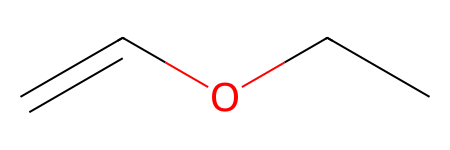

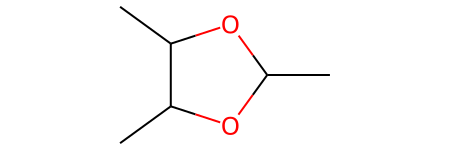

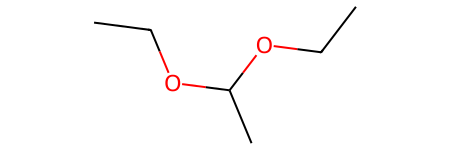

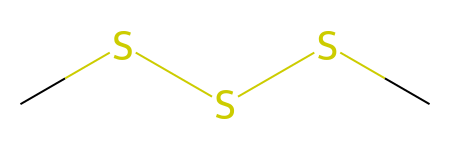

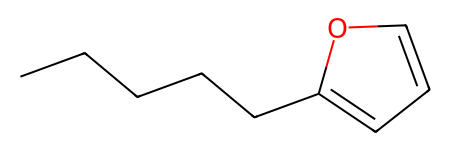

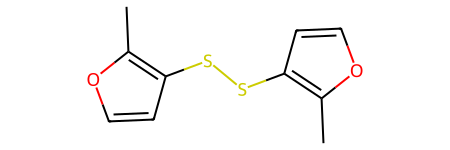

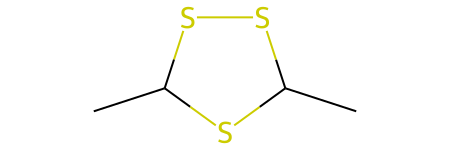

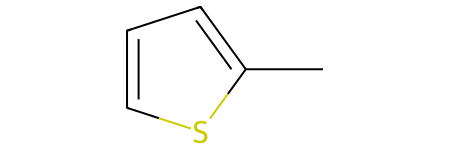

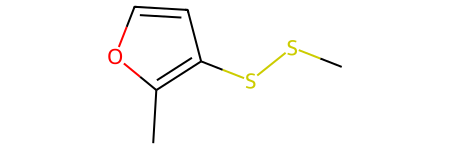

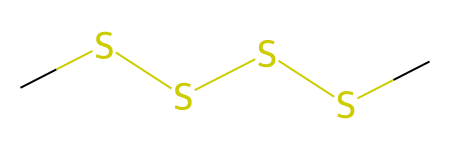

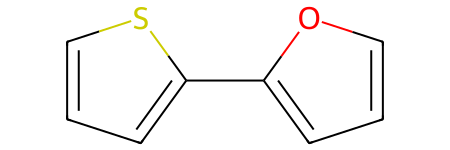

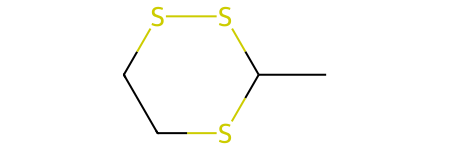

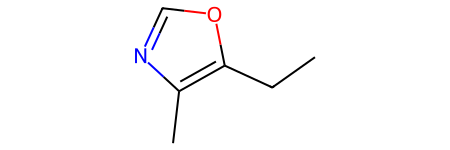

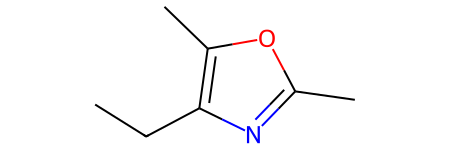

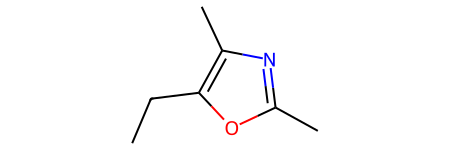

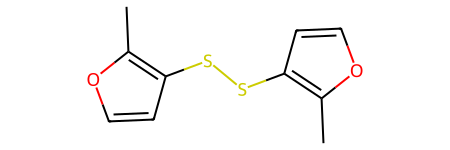

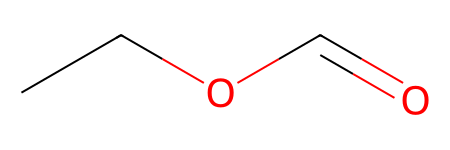

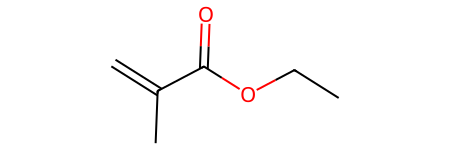

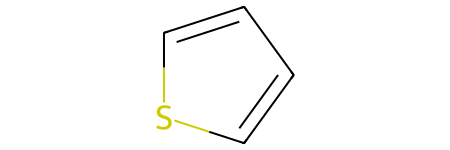

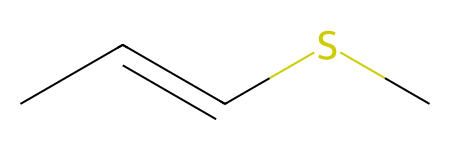

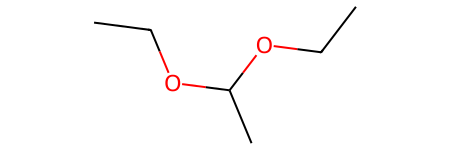

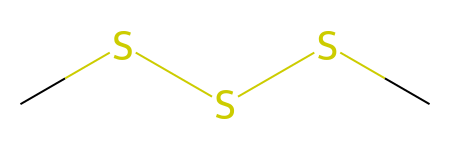

In [18]:
for i in fail_target_smiles:
    mol = Chem.MolFromSmiles(i)
    display(mol)

In [19]:
print(len(list(set(fail_target_smiles))))

19


In [20]:
with open(mnxmeta_smile_inchikey_dict_path, 'r') as f:
    mnxmeta_smile_inchikey_dict = json.load(f)

In [21]:
total_inchikey0 = [smiles2inchikey0(x) for x in fail_target_smiles]
get_smiles2metnetx(list(mnxmeta_smile_inchikey_dict.keys()), total_inchikey0,not_lipid_fail_smiles2metnetx_path,num_processes=30)
smiles_metnetx_reverse(not_lipid_fail_smiles2metnetx_path,total_inchikey0,mnxmeta_smile_inchikey_dict)
merge_metnetx_smiles(fail_target_smiles,not_lipid_fail_smiles2metnetx_path,not_lipid_YMDB_fail_met_smile_final_expand_file)

100%|██████████| 19/19 [00:00<00:00, 184899.71it/s]


22


100%|██████████| 19/19 [00:00<00:00, 388740.37it/s]

21


In [22]:
not_lipid_YMDB_fail_met_smile_final_expand = load_pickle(not_lipid_YMDB_fail_met_smile_final_expand_file)
#save to txt file
with open(not_lipid_YMDB_fail_met_smile_final_expand_txt_file, 'w') as f:
   
    for i in not_lipid_YMDB_fail_met_smile_final_expand:
        f.write(i+'\n')

In [23]:
yeast8_total_smiles = get_all_smiles_in_model(yeast_model_path,ymdb_output_final)
success_smiles = load_pickle(YMDB_success_met_smile_uptake_file)
uptake_met = pd.read_csv(uptake_met_path)   
uptake_smiles = uptake_met['SMILES'].to_list()
sink_smiles = yeast8_total_smiles + success_smiles + uptake_smiles
not_lipid_rxndb_met_max_score = pd.read_csv(not_lipid_rxndb_met_max_score_file)
not_lipid_rxndb_met_max_score = not_lipid_rxndb_met_max_score[not_lipid_rxndb_met_max_score['score']==1]
not_lipid_rxndb_met_max_smiles = not_lipid_rxndb_met_max_score['smile'].tolist()
sink_smiles = sink_smiles + not_lipid_rxndb_met_max_smiles
sink_inchi = [Chem.MolToInchi(Chem.MolFromSmiles(i)) for i in sink_smiles if Chem.MolFromSmiles(i)]
sink_inchi = list(set(sink_inchi))
len(sink_inchi)


4436

In [24]:
#save sink_inchi to csv
sink_inchi_pd = pd.DataFrame(sink_inchi,columns=['inchi'])
sink_inchi_pd.to_csv(sink_inchi_path,index=False)

In [25]:
# sink_inchi_pd = pd.read_csv(sink_inchi_path)
sink_inchi_pd.head()

,inchi
0,InChI=1S/C75H138O17P2/c1-5-9-13-17-21-25-29-33...
1,InChI=1S/C14H28O3/c1-2-3-4-5-6-7-8-9-10-11-13(...
2,"InChI=1S/C5H11O8P/c6-1-3(7)5(9)4(8)2-13-14(10,..."
3,InChI=1S/C19H40NO7P/c1-2-3-4-5-6-7-8-9-10-11-1...
4,InChI=1S/C31H54N7O17P3S/c1-4-5-6-7-8-9-10-11-2...


In [26]:
sink_inchi_pd['mol'] = sink_inchi_pd['inchi'].progress_apply(lambda x: Chem.MolToSmiles(Chem.MolFromInchi(x)))

100%|██████████| 4436/4436 [00:03<00:00, 1414.31it/s]


In [27]:
sink_inchi_pd = sink_inchi_pd.drop(columns=['inchi'])
sink_inchi_pd.to_csv(sink_smiles_path,index=False)

In [7]:
# not_lipid_YMDB_fail_met_smile_final_expand = pd.read_csv(not_lipid_YMDB_fail_met_smile_final_expand_txt_file,sep='\t',header=None)
# not_lipid_YMDB_fail_met_smile_final_expand.columns = ['SMILES']
# not_lipid_YMDB_fail_met_smile_final_expand.head()


,SMILES
0,CCOC=O
1,C/C=C/SC
2,c1ccsc1
3,C/C=C\SC
4,C=C(C)C(=O)OCC


In [8]:
# not_lipid_YMDB_fail_met_smile_final_expand_ = pd.read_csv(not_lipid_YMDB_fail_met_smile_final_expand_txt_file_,sep='\t',header=None)
# not_lipid_YMDB_fail_met_smile_final_expand_.columns = ['SMILES']
# not_lipid_YMDB_fail_met_smile_final_expand_.head()


,SMILES
0,CSSSSC
1,CC1SSC(C)S1
2,C/C=C\SC
3,CC=CSC
4,CSSc1ccoc1C


In [10]:
# not_lipid_YMDB_fail_met_smile_final_expand_smiles_ = set(not_lipid_YMDB_fail_met_smile_final_expand_['SMILES'].tolist())
# print(len(not_lipid_YMDB_fail_met_smile_final_expand_smiles_))
# not_lipid_YMDB_fail_met_smile_final_expand_smiles = set(not_lipid_YMDB_fail_met_smile_final_expand['SMILES'].tolist())
# print(len(not_lipid_YMDB_fail_met_smile_final_expand_smiles))
# not_lipid_YMDB_fail_met_smile_final_expand_smiles_diff = not_lipid_YMDB_fail_met_smile_final_expand_smiles.difference(not_lipid_YMDB_fail_met_smile_final_expand_smiles_)
# print(len(not_lipid_YMDB_fail_met_smile_final_expand_smiles_diff))


21
21
0
